### "데이터 문화가 되다"  
2021(제2회) NH투자증권 빅데이터 경진대회 BASELINE

BASELINE을 통해 간단한 데이터 소개와 함께 힌트를 제공하려고 합니다.  
이번 대회는 stk_hld_train.csv 파일의 hold_d를 Y값으로 모델을 학습시키고  
stk_hld_test.csv 파일의 hold_d를 예측하는 과제를 풀어야 합니다.

이미 눈치채신 분들도 있겠지만 stk_hld_test 데이터에는 stk_hld_train 데이터에 없는 column이 있습니다.  
바로 "hist_d" column입니다. "hist_d"는 stk_hld_test 데이터에 속한 고객이 2021년 이전에 주식을 보유한 기간입니다.

#### *Hint  
<span style="color:red"><U>**Hold_d(보유기간) – hist_d(‘20년 12월 31일까지의 최근 보유기간) ≤ 146**</U></span>  
  
2021년 데이터 기간은 ‘21년 1월 1일 ~ ‘21년 7월 31일로 제한했습니다.  
  
따라서 학습 데이터 셋에서 다양한 기준으로 hist_d column을 만들어 새로운 feature로 사용해 보시는 것을 추천드립니다.

#### *Hint

추가적으로 새로운 feature로 사용할 수 있는 정보에는 고객의 이전 주식 보유이력이 있습니다.(past_d로 칭하겠습니다.)  
  
stk_bnc_hist.csv 데이터를 살펴보면 stk_hld_test.csv 고객들의 이전 주식 보유이력(past_d)을 확인할 수 있습니다.  
  
stk_hld_train.csv도 마찬가지로 past_d column을 만들 수 있을 것으로 보입니다.

### 라이브러리 불러오기

In [886]:
hist

,act_id,bse_dt,iem_cd,bnc_qty,tot_aet_amt,stk_par_pr
0,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200820,A008770,40.0,2828000.0,5000.0
1,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A008770,20.0,1390000.0,5000.0
2,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20160104,A005940,311.0,2982490.0,5000.0
3,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200814,A005930,40.0,2320000.0,100.0
4,1119c23c3a504ca7b75060277410c0f6fb9018ec7638c2...,20200623,A005930,20.0,1028000.0,100.0
...,...,...,...,...,...,...
2573834,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200806,A035720,1.0,364000.0,500.0
2573835,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200813,A035720,0.0,0.0,500.0
2573836,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200819,A035720,1.0,376500.0,500.0
2573837,720aa28d24bfa8fbeddf4fe625cb53af0a6f7ff2d526de...,20200825,A035720,0.0,0.0,500.0


In [3]:
#기본 패키지
import time
import warnings
warnings.filterwarnings('ignore')


#시각화 패키지
import matplotlib as mpl
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from matplotlib import rc 
rc('font', family='malgun gothic')
rc('axes', unicode_minus = False)
import seaborn as sns
plt.style.use('ggplot')

#수학 패키지
from scipy.stats.mstats import gmean
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
import uuid
import random
from itertools import combinations

#머신러닝 패키지
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import *
from sklearn.naive_bayes import GaussianNB 
from sklearn.linear_model import LogisticRegression, SGDClassifier, LinearRegression, SGDRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from vecstack import stacking, StackingTransformer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

#딥러닝 패키지
#import tensorflow.keras as keras
#import tensorflow as tf
#from tensorflow.keras import backend as K
#from tensorflow.keras.models import * #Model
#from tensorflow.keras.optimizers import *
#from tensorflow.keras.regularizers import *
#from keras.utils.np_utils import *
#from tensorflow.keras.utils.vis_utils import * #model_to_dot
#from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
#from tensorflow.keras.losses import *
#from tensorflow.keras import layers
#print('tf Version \n', tf.__version__)
#print('tf.keras Version \n', tf.keras.__version__)

import lightgbm as lgb
import numpy as np
import pandas as pd
from pprint import pprint
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

import warnings
from tqdm import tqdm, tqdm_notebook
from sklearn.model_selection import cross_val_score
import random

#import kerastuner as kt


from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) # for Windows OS user
import datetime
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import BayesianRidge
#from tensorflow import keras
from scipy.stats.mstats import gmean
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import sys, warnings
if not sys.warnoptions: warnings.simplefilter("ignore")
    
import datetime as dt
import os 
import glob
import numpy as np
# Standard library imports
import itertools

# Third party imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as LGB
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Lasso,ElasticNet,Ridge
from sklearn.svm import SVR

import plotly 
import plotly.express as px
import plotly.graph_objects as go 
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import shap
import seaborn as sns

import klib
# Dacon plotly 그림 업로드 
pd.options.plotting.backend = 'plotly'
## plotly.io를 import 한 후 renderers 기본값을 꼭 "notebook_connected" 로 설정해주시기 바랍니다.
import plotly.io as pio
pio.renderers.default = "notebook_connected"

# for "3-2. Feature Engineering"
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import RobustScaler, StandardScaler

# for "4. Modeling with Pycaret"
#from pycaret.regression import *

# for "5. Modeling with CatBoostRegressor"
from catboost import CatBoostRegressor
import optuna
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# 한글폰트 설정, 그래프 마이너스 표시 설정
import matplotlib
from matplotlib import font_manager, rc
from matplotlib import pyplot as plt
import platform
import seaborn as sns
# Dacon plotly 그림 업로드 
pd.options.plotting.backend = 'plotly'
## plotly.io를 import 한 후 renderers 기본값을 꼭 "notebook_connected" 로 설정해주시기 바랍니다.
import plotly.io as pio
pio.renderers.default = "notebook_connected"

#options 
pd.set_option('display.max_columns', None)
rc('font', family='AppleGothic')
matplotlib.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False


#options 
pd.set_option('display.max_columns', None)
#rc('font', family='AppleGothic')
#matplotlib.rcParams['axes.unicode_minus'] = False

from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

### 데이터 불러오기

In [4]:
cus = pd.read_csv("data/cus_info.csv")
iem = pd.read_csv("data/iem_info_20210902.csv")
hist = pd.read_csv("data/stk_bnc_hist.csv")
train = pd.read_csv("data/stk_hld_train.csv")
test = pd.read_csv("data/stk_hld_test.csv")

krx=pd.read_csv('krx_clean_data.csv')
submission = pd.read_csv("data/sample_submission.csv")

In [5]:
krx

,날짜,시가,고가,저가,종가,거래량,등락률,종목코드
0,2016-01-04,8130,8150,7920,8140,281440,0.000000,A000020
1,2016-01-05,8040,8250,8000,8190,243179,0.006143,A000020
2,2016-01-06,8200,8590,8110,8550,609906,0.043956,A000020
3,2016-01-07,8470,8690,8190,8380,704752,-0.019883,A000020
4,2016-01-08,8210,8900,8130,8770,802330,0.046539,A000020
...,...,...,...,...,...,...,...,...
2957890,2020-12-30,9950,10095,9845,10080,467579,0.025432,A371150
2957891,2020-12-24,9970,10083,9940,10064,250532,-0.001587,A373490
2957892,2020-12-28,10118,10197,10039,10044,55898,-0.001987,A373490
2957893,2020-12-29,10192,10371,10192,10371,39694,0.032557,A373490


In [ ]:
train['byn_dt'] = train.byn_dt.astype(str)

In [163]:
train['byn_dt'] = pd.to_datetime(train.byn_dt)

In [164]:
hold_list=list(train.hold_d)

In [165]:
list1=[i for i in range(0,681472)]

In [166]:
sell_list=[]
for i,j in zip(list1, hold_list):
    hi=train.byn_dt[i]+pd.DateOffset(days=j)
    sell_list.append(hi)
    


In [167]:
f=pd.DataFrame(sell_list)
f.columns=['sell_dt']

new_train=pd.concat([train,f],axis=1,ignore_index=True)
new_train.columns=['act_id','iem_cd','byn_dt','hold_d','sell_dt']

In [168]:
new_train.loc[(new_train.byn_dt.dt.year==2016)&((new_train.sell_dt.dt.year.isin([2016,2017,2018,2019,2020]))&(new_train.sell_dt.dt.month<8)),'0']=1

In [169]:
new_train.loc[(new_train.byn_dt.dt.year==2017)&((new_train.sell_dt.dt.year.isin([2017,2018,2019,2020]))&(new_train.sell_dt.dt.month<8)),'0']=1

In [170]:
new_train.loc[(new_train.byn_dt.dt.year==2018)&((new_train.sell_dt.dt.year.isin([2018,2019,2020]))&(new_train.sell_dt.dt.month<8)),'0']=1

In [171]:
new_train.loc[(new_train.byn_dt.dt.year==2019)&((new_train.sell_dt.dt.year.isin([2019,2020]))&(new_train.sell_dt.dt.month<8)),'0']=1

In [172]:
new_train.loc[(new_train.byn_dt.dt.year==2020)&((new_train.sell_dt.dt.year.isin([2020]))&(new_train.sell_dt.dt.month<8)),'0']=1

In [173]:
new_train['sell_dt']=new_train.sell_dt.astype(str)
new_train['sell_dt']=new_train.sell_dt.map(lambda x : x.replace('-',''))

In [174]:
new_train2=new_train[new_train['0']==1]

In [175]:
train=new_train2

In [176]:
train['byn_dt']=train.byn_dt.astype(str)
train['byn_dt']=train.byn_dt.apply(lambda x : x.replace('-',''))
train['byn_dt']=train.byn_dt.astype('int64')

### 데이터 전처리

In [481]:
# 앞서 언급한 것처럼 베이스라인에서는 "hist_d" column을 임의로 생성하여 모델을 학습시키도록 하겠습니다.
# 베이스라인에서는 "hold_d"값, 즉 주식 보유기간의 0.6배에 해당하는 기간을 임의로 설정하여 "hist_d"를 생성하였습니다.
# 결국 모델은 "hist_d"만큼 주식을 보유 했을때의 "hold_d"를 예측하게 될 것입니다.

#train["hist_d"] = train["hold_d"]*0.7
#train.hist_d = np.trunc(train["hist_d"])


In [632]:
# train과 test에 고객정보(cus_info)와 주식정보(iem_info)를 추가하겠습니다.

train_data = pd.merge(train, cus, how = "left", on = ["act_id"])
train_data = pd.merge(train_data, iem, how = "left", on = ["iem_cd"])

test_data = pd.merge(test, cus, how = "left", on = ["act_id"])
test_data = pd.merge(test_data, iem, how = "left", on = ["iem_cd"])

In [633]:
# train_data에서 Y값을 추출한 후 hold_d column을 지워주겠습니다.

train_label = train_data["hold_d"]
train_data.drop(["hold_d"], axis = 1, inplace = True)

In [634]:
# 추가적으로 약간의 전처리를 통해 train data와 test data를 구성하겠습니다.
#잔고금액/잔고수량
hist["stk_p"] = hist["tot_aet_amt"] / hist["bnc_qty"]
hist = hist.fillna(0)

train_data = pd.merge(train_data, hist, how = "left", on = ["act_id", "iem_cd"])
train_data = train_data[(train_data["byn_dt"] == train_data["bse_dt"])]
train_data.reset_index(drop = True, inplace = True)

test_data = pd.merge(test_data, hist, how = "left", on = ["act_id", "iem_cd"])
test_data = test_data[(test_data["byn_dt"] == test_data["bse_dt"])]
test_data.reset_index(drop = True, inplace = True)

#train_data = train_data.drop(["act_id", "iem_cd", "byn_dt", "bse_dt"], axis = 1)
#test_data = test_data.drop(["act_id", "iem_cd", "byn_dt", "submit_id", "hold_d", "bse_dt"], axis = 1)

#L_encoder = LabelEncoder()
#L_encoder.fit(iem["iem_krl_nm"])
#train_data["iem_krl_nm"] = L_encoder.transform(train_data["iem_krl_nm"])
#test_data["iem_krl_nm"] = L_encoder.transform(test_data["iem_krl_nm"])

In [635]:
train_data.reset_index(drop = True, inplace=True)
train_label.reset_index(drop = True, inplace=True)

In [636]:
#투자종목이 다양할수록 단기로 치고빠지는 사람일가능성이 높을거라 예상
f=train_data.groupby('act_id')['iem_cd'].agg([('주식투자종목다양도',lambda x: x.nunique())]).reset_index()
train_data=pd.merge(train_data,f,on='act_id')

f_te=test_data.groupby('act_id')['iem_cd'].agg([('주식투자종목다양도',lambda x: x.nunique())]).reset_index()
test_data=pd.merge(test_data,f_te,on='act_id')

In [637]:
train_data['주식투자다양비율']=train_data['주식투자종목다양도']/train_data.iem_cd.nunique()
test_data['주식투자다양비율']=test_data['주식투자종목다양도']/test_data.iem_cd.nunique()

In [638]:
#투자성향(성격)*투자종목수 / 성격유형에 따른 주식투자행동에 관현연구 (조국행,이지은) 유의확률 0.017로 상관관계있음.
train_data['성향*투자종목수']=train_data['ivs_icn_cd']*train_data['주식투자종목다양도']
test_data['성향*투자종목수']=test_data['ivs_icn_cd']*test_data['주식투자종목다양도']

In [639]:
f=train_data.groupby('act_id')['sex_dit_cd'].count().reset_index()
f.rename(columns= {'sex_dit_cd' :'전체매도횟수'},inplace=True)
train_data=pd.merge(train_data,f,on='act_id')

f_te=test_data.groupby('act_id')['sex_dit_cd'].count().reset_index()
f_te.rename(columns= {'sex_dit_cd' :'전체매도횟수'},inplace=True)
test_data=pd.merge(test_data,f_te,on='act_id')


In [640]:
btp_train=pd.concat([train_data, pd.get_dummies(train_data['btp_cfc_cd'])], axis=1)

In [641]:
btp_test=pd.concat([test_data, pd.get_dummies(test_data['btp_cfc_cd'])], axis=1)

In [642]:
for i in range(1,15):
    f=btp_train.groupby('act_id')[i].sum().reset_index()
    f.rename(columns = {i:str(i)+'업종 매도횟수'},inplace=True)
    train_data=pd.merge(train_data,f,on='act_id')

    f_te=btp_test.groupby('act_id')[i].sum().reset_index()
    f_te.rename(columns = {i:str(i)+'업종 매도횟수'},inplace=True)
    test_data=pd.merge(test_data,f_te,on='act_id')



In [643]:
for i in range(1,15):
    train_data[str(i)+'업종매도비율']=train_data[str(i)+'업종 매도횟수']/train_data['전체매도횟수']
    
    test_data[str(i)+'업종매도비율']=test_data[str(i)+'업종 매도횟수']/test_data['전체매도횟수']

In [644]:
f=train_data.groupby(['act_id'])['bnc_qty'].agg([('총잔고수량',np.sum)])
train_data=pd.merge(train_data,f,on='act_id')

f_te=test_data.groupby(['act_id'])['bnc_qty'].agg([('총잔고수량',np.sum)])
test_data=pd.merge(test_data,f_te,on='act_id')

In [645]:
f=train_data.groupby(['act_id'])['tot_aet_amt'].agg([('총잔고금액',np.sum)])
train_data=pd.merge(train_data,f,on='act_id')

f_te=test_data.groupby(['act_id'])['tot_aet_amt'].agg([('총잔고금액',np.sum)])
test_data=pd.merge(test_data,f_te,on='act_id')

In [646]:
f=train_data.groupby('act_id')['tot_aet_amt'].agg([('1주당평균액',np.mean)])
train_data=pd.merge(train_data,f,on='act_id')

f_te=test_data.groupby('act_id')['tot_aet_amt'].agg([('1주당평균액',np.mean)])
test_data=pd.merge(test_data,f_te,on='act_id')

In [647]:
btp_train=pd.concat([train_data, pd.get_dummies(train_data['mkt_pr_tal_scl_tp_cd'])], axis=1)
btp_test=pd.concat([test_data, pd.get_dummies(test_data['mkt_pr_tal_scl_tp_cd'])], axis=1)

In [648]:
mkt_list=[1,2,3,99]
for i in mkt_list:
    f=btp_train.groupby('act_id')[i].sum().reset_index()
    f.rename(columns = {i:str(i)+'시가총액매도횟수'},inplace=True)
    train_data=pd.merge(train_data,f,on='act_id')

    f_te=btp_test.groupby('act_id')[i].sum().reset_index()
    f_te.rename(columns = {i:str(i)+'시가총액매도횟수'},inplace=True)
    test_data=pd.merge(test_data,f_te,on='act_id')



In [649]:

for i in mkt_list:
    train_data[str(i)+'시가총액구매비율']=train_data[str(i)+'시가총액매도횟수']/train_data['전체매도횟수']
    
    test_data[str(i)+'시가총액구매비율']=test_data[str(i)+'시가총액매도횟수']/test_data['전체매도횟수']

In [650]:
btp_train=pd.concat([train_data, pd.get_dummies(train_data['stk_dit_cd'])], axis=1)
btp_test=pd.concat([test_data, pd.get_dummies(test_data['stk_dit_cd'])], axis=1)

In [651]:
stk_list=[1,2,99]
for i in stk_list:
    f=btp_train.groupby('act_id')[i].sum().reset_index()
    f.rename(columns = {i:str(i)+'시장구분매도횟수'},inplace=True)
    train_data=pd.merge(train_data,f,on='act_id')

    f_te=btp_test.groupby('act_id')[i].sum().reset_index()
    f_te.rename(columns = {i:str(i)+'시장구분매도횟수'},inplace=True)
    test_data=pd.merge(test_data,f_te,on='act_id')



In [652]:

for i in stk_list:
    train_data[str(i)+'시장구분구매비율']=train_data[str(i)+'시장구분매도횟수']/train_data['전체매도횟수']
    
    test_data[str(i)+'시장구분구매비율']=test_data[str(i)+'시장구분매도횟수']/test_data['전체매도횟수']

In [653]:
krx['날짜']=krx.날짜.str.replace('-','')

In [654]:
train_data['byn_dt']=train_data.byn_dt.astype(str)
test_data['byn_dt']=test_data.byn_dt.astype(str)

In [655]:
train_data=pd.merge(train_data,krx,how='left',left_on=['byn_dt','iem_cd'],right_on=['날짜','종목코드'])
test_data=pd.merge(test_data,krx,how='left',left_on=['byn_dt','iem_cd'],right_on=['날짜','종목코드'])

In [656]:
def up_down(x):
    if x >0 :
        return 2
    elif x <0:
        return 1
    else: 
        return 0 

train_data['고객매수특성']=train_data.등락률.apply(up_down)
test_data['고객매수특성']=test_data.등락률.apply(up_down)

btp_train=pd.concat([train_data, pd.get_dummies(train_data['고객매수특성'])], axis=1)
btp_test=pd.concat([test_data, pd.get_dummies(test_data['고객매수특성'])], axis=1)

buy_list=[0,1,2]
for i in buy_list:
    f=btp_train.groupby('act_id')[i].sum().reset_index()
    f.rename(columns = {i:str(i)+'특성별고객매수횟수'},inplace=True)
    train_data=pd.merge(train_data,f,on='act_id')

    f_te=btp_test.groupby('act_id')[i].sum().reset_index()
    f_te.rename(columns = {i:str(i)+'특성별고객매수횟수'},inplace=True)
    test_data=pd.merge(test_data,f_te,on='act_id')



In [657]:
#train_data.drop(['sell_dt','0'],axis=1,inplace=True)

In [658]:
train_data = train_data.drop(["act_id", "iem_cd", "byn_dt", "bse_dt",'날짜','종목코드','iem_krl_nm'], axis = 1)
test_data = test_data.drop(["act_id", "iem_cd", "byn_dt", "submit_id", "hold_d", "bse_dt",'날짜','종목코드','iem_krl_nm'], axis = 1)

test_data.drop('hist_d',axis=1,inplace=True)

In [582]:
train_data.drop(['sell_dt','0'],axis=1,inplace=True)

KeyError: "['sell_dt' '0'] not found in axis"

In [659]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5, weights='uniform',)
value = imputer.fit_transform(train_data)
train_data = pd.DataFrame(columns = train_data.columns, data = value)


value_te = imputer.transform(test_data)
test_data = pd.DataFrame(columns = test_data.columns, data = value_te)

In [ ]:
# train_x
#train_data['sss_weighted'] = (train_data.tot_ivs_te_sgm_cd) * 4 + (train_data.전체매도횟수) * 2
#for function_name in ['min', 'max', 'sum', 'mean', 'std']:
#    train_data['sss_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
#    train_data[['tot_ivs_te_sgm_cd', '전체매도횟수']], axis=1)
#train_data['sss_cv'] = train_data['sss_std']/train_data['sss_mean']
    
    
# test_x
#test_data['sss_weighted'] = (test_data.tot_ivs_te_sgm_cd) * 4 + (test_data.전체매도횟수) * 2
#for function_name in ['min', 'max', 'sum', 'mean', 'std']:
#    test_data['sss_{}'.format(function_name)] = eval('np.{}'.format(function_name))(
#    test_data[['tot_ivs_te_sgm_cd', '전체매도횟수']], axis=1)
#test_data['sss_cv'] = test_data['sss_std']/test_data['sss_mean']
           

# 실행x

In [39]:
train_data['sell_dt']=train_data['sell_dt'].astype(str)
train_data['sell_dt']=train_data['sell_dt'].apply(lambda x: x.replace('-',''))

KeyError: 'sell_dt'

In [1248]:
pd.merge(train_data,f,how='left',left_on=['sell_dt','iem_cd'],right_on=['날짜','종목코드'])

,act_id,iem_cd,byn_dt,sell_dt,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bse_dt,bnc_qty,tot_aet_amt,stk_par_pr,stk_p,주식투자종목다양도,주식투자다양비율,성향*투자종목수,전체매도횟수,1업종 매도횟수,2업종 매도횟수,3업종 매도횟수,4업종 매도횟수,5업종 매도횟수,6업종 매도횟수,7업종 매도횟수,8업종 매도횟수,9업종 매도횟수,10업종 매도횟수,11업종 매도횟수,12업종 매도횟수,13업종 매도횟수,14업종 매도횟수,1업종매도비율,2업종매도비율,3업종매도비율,4업종매도비율,5업종매도비율,6업종매도비율,7업종매도비율,8업종매도비율,9업종매도비율,10업종매도비율,11업종매도비율,12업종매도비율,13업종매도비율,14업종매도비율,총잔고수량,총잔고금액,1주당평균액,1시가총액매도횟수,2시가총액매도횟수,3시가총액매도횟수,99시가총액매도횟수,1시가총액구매비율,2시가총액구매비율,3시가총액구매비율,99시가총액구매비율,1시장구분매도횟수,2시장구분매도횟수,99시장구분매도횟수,1시장구분구매비율,2시장구분구매비율,99시장구분구매비율,날짜_x,시가_x,고가,저가,종가,거래량,등락률,종목코드_x,날짜_y,시가_y,종목코드_y
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,20180806,1,9,3,2,2,9,5,5,8,GS건설,1,1,1,20180726,274.0,11782000.0,5000.0,43000.0,74,0.026580,222,94,2.0,4.0,0,0,7.0,2.0,3.0,2,2.0,37.0,1.0,4.0,29.0,1.0,0.021277,0.042553,0.000000,0.0,0.074468,0.021277,0.031915,0.021277,0.021277,0.393617,0.010638,0.042553,0.308511,0.010638,36209.0,3.830028e+08,4.074498e+06,31.0,35.0,28.0,0.0,0.329787,0.37234,0.297872,0.000000,11.0,34.0,49.0,0.117021,0.361702,0.521277,20180726,46500.0,46650.0,42850.0,43000.0,3169657.0,-0.094737,A006360,20180806,45700.0,A006360
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,20180421,1,9,3,2,2,9,5,5,8,삼성전자,9,1,1,20180131,2.0,4990000.0,5000.0,2495000.0,74,0.026580,222,94,2.0,4.0,0,0,7.0,2.0,3.0,2,2.0,37.0,1.0,4.0,29.0,1.0,0.021277,0.042553,0.000000,0.0,0.074468,0.021277,0.031915,0.021277,0.021277,0.393617,0.010638,0.042553,0.308511,0.010638,36209.0,3.830028e+08,4.074498e+06,31.0,35.0,28.0,0.0,0.329787,0.37234,0.297872,0.000000,11.0,34.0,49.0,0.117021,0.361702,0.521277,20180131,50020.0,54140.0,49600.0,49900.0,1293626.0,0.002008,A005930,NaN,NaN,NaN
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,20180522,1,9,3,2,2,9,5,5,8,코스모신소재,12,2,99,20180517,786.0,14619600.0,1000.0,18600.0,74,0.026580,222,94,2.0,4.0,0,0,7.0,2.0,3.0,2,2.0,37.0,1.0,4.0,29.0,1.0,0.021277,0.042553,0.000000,0.0,0.074468,0.021277,0.031915,0.021277,0.021277,0.393617,0.010638,0.042553,0.308511,0.010638,36209.0,3.830028e+08,4.074498e+06,31.0,35.0,28.0,0.0,0.329787,0.37234,0.297872,0.000000,11.0,34.0,49.0,0.117021,0.361702,0.521277,20180517,14432.0,17599.0,14432.0,16830.0,3393334.0,0.203863,A005070,NaN,NaN,NaN
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,20201112,20201204,1,9,3,2,2,9,5,5,8,영진약품,8,2,1,20201112,60.0,462000.0,500.0,7700.0,74,0.026580,222,94,2.0,4.0,0,0,7.0,2.0,3.0,2,2.0,37.0,1.0,4.0,29.0,1.0,0.021277,0.042553,0.000000,0.0,0.074468,0.021277,0.031915,0.021277,0.021277,0.393617,0.010638,0.042553,0.308511,0.010638,36209.0,3.830028e+08,4.074498e+06,31.0,35.0,28.0,0.0,0.329787,0.37234,0.297872,0.000000,11.0,34.0,49.0,0.117021,0.361702,0.521277,20201112,8500.0,8700.0,7670.0,7700.0,24174657.0,-0.012821,A003520,20201204,7850.0,A003520
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,20180905,20190726,1,9,3,2,2,9,5,5,8,아세아제지,10,3,99,20180905,183.0,8125200.0,5000.0,44400.0,74,0.026580,222,94,2.0,4.0,0,0,7.0,2.0,3.0,2,2.0,37.0,1.0,4.0,29.0,1.0,0.021277,0.042553,0.000000,0.0,0.074468,0.021277,0.031915,0.021277,0.021277,0.393617,0.010638,0.042553,0.308511,0.010638,36209.0,3.830028e+08,4.074498e+06,31.0,35.0,28.0,0.0,0.329787,0.37234,0.297872,0.000000,11.0,34.0,49.0,0.117021,0.361702,0.521277,20180905,43100.0,45150.0,42750.0,44400.0,100481.0,0.030162,A002310,20190726,34000.0,A002310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681467,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A260660,20180831,20180901,1,4,4,2,2,3,4,3,8,알리코제약,10,3,99,20180831,199.

In [1240]:
f=krx.loc[:,['날짜','시가','종목코드']]

In [ ]:
train_data = pd.merge(train_data, hist, how = "left", on = ["act_id", "iem_cd"])
train_data = train_data[(train_data["byn_dt"] == train_data["bse_dt"])]

In [322]:
#new=krx[krx.날짜=='20160104']
#new2=krx[krx.날짜=='20170102']

In [323]:
#krx['2016년1월시가']=new['시가']
#krx['2017년1월시가']=new2['시가']

In [324]:
siga2016=krx.groupby('종목코드')['2016년1월시가'].first()

In [325]:
siga2017=krx.groupby('종목코드')['2017년1월시가'].first()

In [326]:
f=siga2017/siga2016

In [327]:
f=pd.DataFrame(f)
f=f.reset_index()
f.columns=['iem_cd','2016년대비 증가율']


In [328]:
train_data=pd.merge(train_data,f,on='iem_cd')
test_data=pd.merge(test_data,f,on='iem_cd')

In [329]:
train_data.replace([np.inf,-np.inf],np.nan,inplace=True)
test_data.replace([np.inf,-np.inf],np.nan,inplace=True)

In [330]:
train_data.fillna(0,inplace=True)
test_data.fillna(0,inplace=True)

In [348]:
jemu=pd.read_csv('2016재무제표.csv',encoding = "cp949")

In [349]:
jemu2=jemu.loc[:,['종목코드','회사명','시장구분','업종명','결산기준일','항목명','당기','전기','전전기']]

In [370]:
jemu_list=list(jemu2[jemu2.회사명=='동화약품'].항목명)

In [ ]:
jemu2

In [360]:
jemu2.시장구분.nunique()

2

In [ ]:
dt = jemu3.rename(columns=dt1.iloc[0])

In [353]:
#jemu2[jemu2.회사명=='동화약품']

In [660]:
from scipy.stats import skew, kurtosis
skew(train_data)

array([ 6.66954153e-01,  4.61221488e-03,  1.32096535e+00,  4.21829257e-01,
        1.74258192e+01,  3.98933674e-01,  9.02606645e+00,  7.34946362e-01,
       -3.33066900e-01, -5.01552788e-01,  4.46038486e+00, -5.07021188e-01,
        5.09377346e+01,  5.06496325e+01,  1.76718991e+00,  1.01497788e+01,
        3.03655444e+00,  3.03655444e+00,  5.52708065e+00,  5.67702430e+00,
        7.00755868e+00,  7.34568895e+00,  6.35253763e+00,  6.64303818e+00,
        4.81337789e+00,  5.79164466e+00,  6.02071236e+00,  3.74258822e+00,
        5.24586994e+00,  5.37604736e+00,  6.32785142e+00,  6.64362909e+00,
        5.50432059e+00,  5.31746450e+00,  7.19022525e+00,  4.80673120e+00,
        6.75824953e+00,  7.64626729e+00,  2.55610385e+00,  4.14701333e+00,
        2.56099557e+00,  3.24050959e+00,  3.29220384e+00, -2.90390550e-01,
        4.26957241e+00,  3.21850442e+00,  4.44709414e-01,  5.93024309e+00,
        5.90010206e+00,  7.14725014e+00,  2.05183083e+01,  8.09112840e+00,
        5.10329075e+00,  

In [661]:
skew_df = pd.DataFrame({'컬럼명': train_data.columns, 'skew': skew(train_data)})

In [662]:
new_skew_df=skew_df[skew_df['skew'] >1].iloc[3:]

In [663]:
T_skew_df=new_skew_df.set_index('컬럼명').T

In [664]:
skew_list=list(T_skew_df.columns)

In [665]:
train_data[skew_list]=np.log1p(train_data[skew_list])

test_data[skew_list]=np.log1p(test_data[skew_list])

In [666]:
train_data['train_label']=train_label

In [667]:
corr = train_data.corr()['train_label'].abs().sort_values(ascending=False)
corr

train_label             1.000000
2특성별고객매수횟수              0.156746
총잔고수량                   0.151270
2시가총액매도횟수               0.148315
총잔고금액                   0.147012
                          ...   
mkt_pr_tal_scl_tp_cd    0.010173
lsg_sgm_cd              0.004220
11업종매도비율                0.003573
5업종매도비율                 0.002426
mrz_pdt_tp_sgm_cd       0.001685
Name: train_label, Length: 76, dtype: float64

In [337]:
train_data.drop('train_label',axis=1, inplace=True)

In [683]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
X= train_data.copy()
X = X.loc[:,corr.index[0:50]]
X.drop(['train_label',  ],axis=1, inplace=True)
feature_names = X.columns.to_list()
#scaler = MinMaxScaler()
#X = scaler.fit(X).transform(X)
#scaler = PowerTransformer()
#X = scaler.fit(X).transform(X)
X = pd.DataFrame(X)
y = train_label
#y=np.log1p(train_label)


# 피쳐 선택은 나중에 우선 상관도 높은 20개 사용 

# 자체검증

### 모델 학습: LGBMRegressor 사용

In [72]:
X_train2, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
clfs = [
   (
        KNeighborsRegressor(),              # 사용하려는 모델
        {'n_neighbors': [3,5,7,9,11],        # 최적화하려는 하이퍼파라미터
         'weights': ['uniform','distance']}
    ),
    (
        LinearRegression(),  
        {
         }
    ),
    (
        RandomForestRegressor(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        GradientBoostingRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
        # 'max_features': (np.arange(0.5, 1.0, 0.1)*X_train.shape[1]).astype(int)}
    ),
    (
        XGBRegressor(tree_method = 'hist', random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.6, 0.1),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
    (
        LGBMRegressor(random_state=0),
        {'min_child_weight': range(0, 121, 20),
         'learning_rate': np.arange(0.1, 0.6, 0.1),
         'subsample': np.arange(0.5, 1.0, 0.1)}
    ),
    (
        AdaBoostRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'learning_rate': [1, 0.1, 0.01],}
    ),
    (
        BaggingRegressor(random_state=0),
        {'n_estimators': [100, 200, 300],
         'max_features': (np.arange(0.5, 1.0, 0.1)*X_train2.shape[1]).astype(int)}
    ),
    (
        CatBoostRegressor(random_state=0,verbose=0),
        {'learning_rate': np.arange(0.1, 0.6, 0.1),
         'depth': [3,4,5]}
    ),
    (
        SGDRegressor(random_state=0),
        {'penalty': ['l1','l2'],
         'alpha': [0.001, 0.05, 1, 100, 200],
         'max_iter': [1000, 2000, 3000]}
    ),
    (
        ExtraTreesRegressor(random_state=0),
        {'n_estimators': [100,200,300],
         'max_depth': [3,4,5,6,7]}
    ),
    (
        DecisionTreeRegressor(random_state=0),              
        {'max_depth': range(2,9,1),        
         'criterion': ['mse', 'friedman_mse', 'mae'],
         'splitter': ['best','random']}
    ),
]

clfs_tuned = []  # 튜닝된 모델을 저장

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for clf, param_grid in tqdm(clfs):
    start = time.time()
    rand_search = RandomizedSearchCV(clf, param_grid, n_iter=5, scoring='neg_mean_squared_error', 
                                     cv=sscv, random_state=0, n_jobs=-1)
    rand_search.fit(X_train2, y_train)
    clf_name = type(clf).__name__
    clf_score = rand_search.score(X_valid, y_valid)
    print('{:30s} {:30f} {:.1f}'.format(clf_name, clf_score, time.time() - start))
    clfs_tuned.append((clf_name, rand_search, clf_score))

  0%|          | 0/12 [01:20<?, ?it/s]


KeyboardInterrupt: 

In [278]:
X_columns=train_data.columns

In [669]:
corr_cat_feaures=list(X.loc[:,['tot_ivs_te_sgm_cd','cus_aet_stn_cd']].columns)

In [670]:
corr_num_feaures = [c for c in X.columns.tolist() if c not in corr_cat_feaures]

In [476]:
num_features=list(train_data.iloc[:,12:].columns)

,2특성별고객매수횟수,총잔고수량,2시가총액매도횟수,총잔고금액,전체매도횟수,10업종 매도횟수,99시장구분매도횟수,2시장구분매도횟수,5업종 매도횟수,8업종 매도횟수,13업종 매도횟수,주식투자종목다양도,3시가총액매도횟수,1시가총액매도횟수,7업종 매도횟수,1특성별고객매수횟수,9업종 매도횟수,6업종 매도횟수,3업종 매도횟수,1시장구분매도횟수,거래량,11업종 매도횟수,12업종 매도횟수,0특성별고객매수횟수,2업종 매도횟수,14업종 매도횟수,10업종매도비율,1업종 매도횟수,tot_ivs_te_sgm_cd,4업종 매도횟수,99시가총액매도횟수,1시장구분구매비율,주식투자다양비율,cus_aet_stn_cd,고객매수특성,성향*투자종목수,2시가총액구매비율,9업종매도비율,99시장구분구매비율,1시가총액구매비율,14업종매도비율,1주당평균액,99시가총액구매비율,2업종매도비율,12업종매도비율,bnc_qty,13업종매도비율,3시가총액구매비율,6업종매도비율
0,3.891820,10.497091,3.583519,19.763553,4.553877,3.637586,3.912023,3.555348,2.079442,1.098612,3.401197,4.317488,3.367296,3.465736,1.386294,3.784190,1.098612,1.098612,0.000000,2.484907,14.969134,0.693147,1.609438,1.386294,1.609438,0.693147,0.393617,1.098612,5.0,0.0,0.000000,0.110666,0.026233,2.0,1.0,5.407172,0.37234,0.021053,0.521277,0.285019,0.010582,15.220258,0.000000,0.041673,0.041673,5.616771,0.308511,0.297872,0.021053
1,3.891820,10.497091,3.583519,19.763553,4.553877,3.637586,3.912023,3.555348,2.079442,1.098612,3.401197,4.317488,3.367296,3.465736,1.386294,3.784190,1.098612,1.098612,0.000000,2.484907,14.072960,0.693147,1.609438,1.386294,1.609438,0.693147,0.393617,1.098612,5.0,0.0,0.000000,0.110666,0.026233,2.0,2.0,5.407172,0.37234,0.021053,0.521277,0.285019,0.010582,15.220258,0.000000,0.041673,0.041673,1.098612,0.308511,0.297872,0.021053
2,3.891820,10.497091,3.583519,19.763553,4.553877,3.637586,3.912023,3.555348,2.079442,1.098612,3.401197,4.317488,3.367296,3.465736,1.386294,3.784190,1.098612,1.098612,0.000000,2.484907,15.037324,0.693147,1.609438,1.386294,1.609438,0.693147,0.393617,1.098612,5.0,0.0,0.000000,0.110666,0.026233,2.0,2.0,5.407172,0.37234,0.021053,0.521277,0.285019,0.010582,15.220258,0.000000,0.041673,0.041673,6.668228,0.308511,0.297872,0.021053
3,3.891820,10.497091,3.583519,19.763553,4.553877,3.637586,3.912023,3.555348,2.079442,1.098612,3.401197,4.317488,3.367296,3.465736,1.386294,3.784190,1.098612,1.098612,0.000000,2.484907,17.000815,0.693147,1.609438,1.386294,1.609438,0.693147,0.393617,1.098612,5.0,0.0,0.000000,0.110666,0.026233,2.0,1.0,5.407172,0.37234,0.021053,0.521277,0.285019,0.010582,15.220258,0.000000,0.041673,0.041673,4.110874,0.308511,0.297872,0.021053
4,3.891820,10.497091,3.583519,19.763553,4.553877,3.637586,3.912023,3.555348,2.079442,1.098612,3.401197,4.317488,3.367296,3.465736,1.386294,3.784190,1.098612,1.098612,0.000000,2.484907,11.517734,0.693147,1.609438,1.386294,1.609438,0.693147,0.393617,1.098612,5.0,0.0,0.000000,0.110666,0.026233,2.0,2.0,5.407172,0.37234,0.021053,0.521277,0.285019,0.010582,15.220258,0.000000,0.041673,0.041673,5.214936,0.308511,0.297872,0.021053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681467,4.317488,12.422498,3.806662,20.942585,5.075174,3.784190,4.867534,2.708050,1.945910,3.555348,3.332205,4.718499,4.584967,2.484907,2.197225,4.394449,1.098612,1.386294,1.609438,2.833213,15.148275,1.609438,1.791759,1.791759,2.639057,1.791759,0.270440,1.791759,3.0,0.0,2.079442,0.095882,0.039096,2.0,2.0,6.098074,0.27673,0.012500,0.811321,0.066894,0.030962,15.873681,0.043084,0.078590,0.030962,5.298317,0.169811,0.610063,0.018692
681468,4.317488,12.422498,3.806662,20.942585,5.075174,3.784190,4.867534,2.708050,1.945910,3.555348,3.332205,4.718499,4.584967,2.484907,2.197225,4.394449,1.098612,1.386294,1.609438,2.833213,13.270776,1.609438,1.791759,1.791759,2.639057,1.791759,0.270440,1.791759,3.0,0.0,2.079442,0.095882,0.039096,2.0,1.0,6.098074,0.27673,0.012500,0.811321,0.066894,0.030962,15.873681,0.043084,0.078590,0.030962,6.192362,0.169811,0.610063,0.018692
681469,4.317488,12.422498,3.806662,20.942585,5.075174,3.784190,4.867534,2.708050,1.945910,3.555348,3.332205,4.718499,4.584967,2.484907,2.197225,4.394449,1.098612,1.386294,1.609438,2.833213,13.739781,1.609438,1.791759,1.791759,2.639057,1.791759,0.270440,1.791759,3.0,0.0,2.079442,0.095882,0.039096,2.0,1.0,6.098074,0.27673,0.012500,0.811321,0.0

In [431]:
num_features=list(train_data.iloc[:,12:].columns)

In [433]:
num_features.remove('고객매수특성')

In [434]:
train_data.replace([np.inf,-np.inf],np.nan,inplace=True)
test_data.replace([np.inf,-np.inf],np.nan,inplace=True)

In [435]:
train_data.fillna(0,inplace=True)
test_data.fillna(0,inplace=True)

In [684]:
X_test = test_data[feature_names]

In [685]:
X.replace([np.inf,-np.inf],np.nan,inplace=True)
X_test.replace([np.inf,-np.inf],np.nan,inplace=True)

In [686]:
X.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

In [284]:
cat_features = [c for c in train_data.columns.tolist() if c not in num_features]

In [ ]:
train_data[num_features] = train_data[num_features].apply(lambda x: x.clip(x.quantile(.05), x.quantile(.95)), axis=0)

In [ ]:
features[num_features] = PowerTransformer(standardize=True).fit_transform(features[num_features])

In [682]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_data[num_features] = scaler.fit_transform(train_data[num_features])
test_data[num_features] = scaler.transform(test_data[num_features])

ValueError: Input contains infinity or a value too large for dtype('float64').

In [687]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X[corr_num_feaures] = scaler.fit_transform(X[corr_num_feaures])
X_test[corr_num_feaures] = scaler.transform(X_test[corr_num_feaures])

In [254]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [158]:
train_data=pd.DataFrame(train_data,columns=X_columns)
test_data=pd.DataFrame(test_data,columns=X_columns)

ValueError: Shape of passed values is (349768, 62), indices imply (349768, 75)

100%|██████████| 95/95 [12:07<00:00,  7.65s/it]


(98, -51.69500368475476)


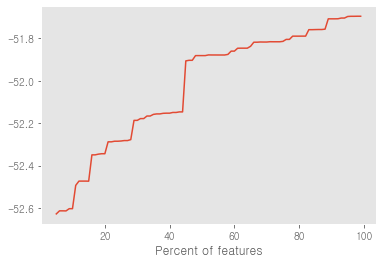

In [405]:
#스태킹용 피쳐
from sklearn.model_selection import ShuffleSplit

model = LinearRegression()

cv_scores = []

sscv = ShuffleSplit(n_splits = 5, random_state = 0)

for p in tqdm(range(5,100,1)):
    X_new = SelectPercentile(percentile=p).fit_transform(train_data, train_label)    
    cv_score = cross_val_score(model, X_new, train_label, scoring='neg_root_mean_squared_error', cv=sscv).mean()
    cv_scores.append((p,cv_score))

# Print the best percentile
best_score = cv_scores[np.argmax([score for _, score in cv_scores])]
print(best_score)

# Plot the performance change with p
plt.plot([k for k, _ in cv_scores], [score for _, score in cv_scores])
plt.xlabel('Percent of features')
plt.grid()

In [406]:
X_columns=train_data.columns

In [407]:
# 과적합을 피하기 위해 최적의 p값 주변의 값을 선택하는게 더 나은 결과를 얻을 수 있다. 
fs = SelectPercentile(percentile=best_score[0]).fit(train_data, train_label)
train_data = fs.transform(train_data)
test_data = fs.transform(test_data)

In [408]:
XX_columns=X_columns[fs.get_support()]

In [409]:
print(train_data.shape)
print(X_columns[fs.get_support()].tolist()) #get_support: 선택한 특성을 불린값으로 보여줘서 어떤 특성을 선택했는지 알 수 있다.

(681472, 69)
['sex_dit_cd', 'cus_age_stn_cd', 'ivs_icn_cd', 'cus_aet_stn_cd', 'lsg_sgm_cd', 'tco_cus_grd_cd', 'tot_ivs_te_sgm_cd', 'mrz_btp_dit_cd', 'iem_krl_nm', 'btp_cfc_cd', 'mkt_pr_tal_scl_tp_cd', 'stk_dit_cd', 'bnc_qty', 'tot_aet_amt', 'stk_par_pr', 'stk_p', '주식투자종목다양도', '주식투자다양비율', '성향*투자종목수', '전체매도횟수', '1업종 매도횟수', '2업종 매도횟수', '3업종 매도횟수', '4업종 매도횟수', '5업종 매도횟수', '6업종 매도횟수', '7업종 매도횟수', '8업종 매도횟수', '9업종 매도횟수', '10업종 매도횟수', '11업종 매도횟수', '12업종 매도횟수', '13업종 매도횟수', '14업종 매도횟수', '1업종매도비율', '2업종매도비율', '3업종매도비율', '4업종매도비율', '5업종매도비율', '6업종매도비율', '7업종매도비율', '8업종매도비율', '9업종매도비율', '10업종매도비율', '11업종매도비율', '12업종매도비율', '13업종매도비율', '14업종매도비율', '총잔고수량', '총잔고금액', '1시가총액매도횟수', '2시가총액매도횟수', '3시가총액매도횟수', '99시가총액매도횟수', '1시가총액구매비율', '2시가총액구매비율', '3시가총액구매비율', '99시가총액구매비율', '1시장구분매도횟수', '2시장구분매도횟수', '99시장구분매도횟수', '1시장구분구매비율', '2시장구분구매비율', '99시장구분구매비율', '시가', '고가', '저가', '종가', '거래량']


In [410]:
train_data=pd.DataFrame(train_data,columns=XX_columns)
test_data=pd.DataFrame(test_data,columns=XX_columns)

# catboost

In [608]:
def objective(trial: Trial) -> float:
    params_cat = {
        "random_state": 42,
        "learning_rate": 0.05,
        "n_estimators": 10000,
        "verbose" : 1,
        "objective" : "RMSE",
        "max_depth": trial.suggest_int("max_depth", 1, 16),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.8, 1.0),
        "subsample": trial.suggest_float("subsample", 0.3, 1.0),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "max_bin": trial.suggest_int("max_bin", 200, 500),
    }
    
    X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2)

    model = CatBoostRegressor(**params_cat)
    model.fit(
        X_tr,
        y_tr,
        eval_set=[(X_tr, y_tr), (X_val, y_val)],
        early_stopping_rounds=10,
        verbose=False,
    )

    cat_pred = model.predict(X_val)
    log_score = np.sqrt(mean_squared_error(y_val, cat_pred))
    
    return log_score

In [609]:
sampler = TPESampler(seed=42)
study = optuna.create_study(
    study_name="cat_opt",
    direction="minimize",
    sampler=sampler,
)
study.optimize(objective, n_trials=10)
print("Best Score:", study.best_value)
print("Best trial:", study.best_trial.params)

[I 2021-10-11 14:51:23,759] A new study created in memory with name: cat_opt
Custom logger is already specified. Specify more than one logger at same time is not thread safe.[I 2021-10-11 14:52:46,073] Trial 0 finished with value: 46.63484770057237 and parameters: {'max_depth': 6, 'colsample_bylevel': 0.9901428612819833, 'subsample': 0.8123957592679836, 'min_child_samples': 62, 'max_bin': 246}. Best is trial 0 with value: 46.63484770057237.
[I 2021-10-11 14:55:35,686] Trial 1 finished with value: 47.60677115575461 and parameters: {'max_depth': 3, 'colsample_bylevel': 0.8116167224336399, 'subsample': 0.9063233020424546, 'min_child_samples': 62, 'max_bin': 413}. Best is trial 0 with value: 46.63484770057237.
[I 2021-10-11 14:59:42,276] Trial 2 finished with value: 49.28228219957806 and parameters: {'max_depth': 1, 'colsample_bylevel': 0.9939819704323989, 'subsample': 0.8827098485602951, 'min_child_samples': 25, 'max_bin': 254}. Best is trial 0 with value: 46.63484770057237.
[I 2021-10-11

Best Score: 46.326121888904474
Best trial: {'max_depth': 13, 'colsample_bylevel': 0.8609227538346742, 'subsample': 0.3683704798044687, 'min_child_samples': 70, 'max_bin': 332}


In [610]:
cat_p = study.best_trial.params
cat = CatBoostRegressor(**cat_p)

In [611]:
y_cat = pd.cut(y, 10, labels=range(10))
skf = StratifiedKFold(5)

preds = []
for tr_id, val_id in skf.split(X, y_cat) : 
    X_tr = X.iloc[tr_id]
    y_tr = y.iloc[tr_id]
    
    cat.fit(X_tr, y_tr, verbose = 0)
    
    pred = cat.predict(X_test)
    preds.append(pred)
cat_pred = np.mean(preds, axis = 0)

In [612]:
cat_pred

array([117.81423503, 109.05693822, 109.97164077, ...,  67.91365634,
        95.99898632,  93.99134042])

# ngboost

In [ ]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from ngboost import NGBClassifier
from ngboost.distns import Bernoulli

if __name__ == "__main__":

    np.random.seed(12345)

    X, Y = load_breast_cancer(return_X_y=True)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

    ngb = NGBClassifier(Dist=Bernoulli)
    ngb.fit(X_train, Y_train)

    preds = ngb.pred_dist(X_test)
    print("ROC:", roc_auc_score(Y_test, preds.probs[1]))

In [ ]:
ngb = NGBClassifier(Dist=Bernoulli,random_state=42,verbose=00)
model.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)

In [688]:
from ngboost import NGBRegressor
models = []

folds = KFold(n_splits=5)
for train_idx, val_idx in folds.split(train_data):
    
    tr_x = X.iloc[train_idx, :]
    tr_y = train_label[train_idx]
    val_x = X.iloc[val_idx, :]
    val_y = train_label[val_idx]
    
    model = NGBRegressor(random_state = 42, n_estimators = 5000, learning_rate = .02, verbose = 00)
    
    model.fit(tr_x, tr_y, val_x, val_y, early_stopping_rounds = 300)
    
    models.append(model)

In [ ]:
from ngboost import NGBClassifier
from ngboost.distns import Bernoulli

ngb = NGBClassifier(random_state = 42, n_estimators = 5000, learning_rate = .02, verbose = 0)

# 모델링 여기만실행

In [533]:
models = { 'LR': LinearRegression() , 'RD' : Ridge(), 'LS' : Lasso(), 'ET' : ElasticNet(),
          'XGB' : XGBRegressor(), 
          'LGB' : LGB.LGBMRegressor(), 
          'CB' : CatBoostRegressor(logging_level='Silent' ), 
          'PLS' : PLSRegression()
}

#CatBoostRegressor은 시끄러운 녀석이라 닥쳐
kfold = KFold(n_splits=5, shuffle = True, random_state=0)
# n_split : 몇개로 분할할지
# shuffle : Fold를 나누기 전에 무작위로 섞을지
# random_state : 나눈 Fold를 그대로 사용할지
answer = []
for model in models.keys():
    print(model)
    scores = cross_val_score(models[model] , X, train_label, cv=kfold, scoring='neg_root_mean_squared_error')
    answer.append(scores)

corss_val_result = pd.DataFrame(answer)
corss_val_result.index = models.keys()
corss_val_result['mean'] = corss_val_result.mean(axis=1)




LR
RD
LS
ET
XGB
LGB
CB
PLS


In [534]:
corss_val_result

,0,1,2,3,4,mean
LR,-50.366032,-50.264610,-51.018865,-49.867594,-50.179624,-50.339345
RD,-50.379738,-50.277305,-51.025793,-49.888499,-50.193433,-50.352953
LS,-51.910934,-51.819890,-52.662204,-51.478573,-51.759458,-51.926212
ET,-52.053398,-51.966026,-52.798552,-51.627471,-51.903406,-52.069771
XGB,-47.532497,-47.415583,-47.807878,-46.724789,-47.254080,-47.346965
LGB,-47.733648,-47.715458,-48.049973,-46.955642,-47.523609,-47.595666
CB,-47.179151,-47.122540,-47.555560,-46.404464,-47.043052,-47.060953
PLS,-51.159736,-51.035510,-51.815385,-50.747985,-50.989161,-51.149555


In [535]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(train_data):
    
    train_x = X.iloc[train_idx, :]
    train_y = train_label[train_idx]
    val_x = X.iloc[val_idx, :]
    val_y = train_label[val_idx]
    
    model = LGBMRegressor(objective= "regression",
                          max_depth= 5,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 62.6596	valid_0's l2: 3926.22
[1000]	valid_0's rmse: 62.3964	valid_0's l2: 3893.31
[1500]	valid_0's rmse: 62.399	valid_0's l2: 3893.63
Early stopping, best iteration is:
[1304]	valid_0's rmse: 62.3818	valid_0's l2: 3891.48
Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 69.6944	valid_0's l2: 4857.31
[1000]	valid_0's rmse: 69.5692	valid_0's l2: 4839.87
[1500]	valid_0's rmse: 69.5115	valid_0's l2: 4831.85
[2000]	valid_0's rmse: 69.488	valid_0's l2: 4828.58
Did not meet early stopping. Best iteration is:
[1922]	valid_0's rmse: 69.4848	valid_0's l2: 4828.13
Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 72.1605	valid_0's l2: 5207.14
[1000]	valid_0's rmse: 71.8372	valid_0's l2: 5160.58
[1500]	valid_0's rmse: 71.8169	valid_0's l2: 5157.67
[2000]	valid_0's rmse: 71.7895	valid_0's l2: 5153.73
Did not meet early stopping. Best iteration is:

In [286]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(train_data):
    
    train_x = train_data.iloc[train_idx, :]
    train_y = train_label[train_idx]
    val_x = train_data.iloc[val_idx, :]
    val_y = train_label[val_idx]
    
    model = LGBMRegressor(objective= "regression",
                          max_depth= 5,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 62.5859	valid_0's l2: 3917
[1000]	valid_0's rmse: 62.4419	valid_0's l2: 3898.99
[1500]	valid_0's rmse: 62.2284	valid_0's l2: 3872.38
[2000]	valid_0's rmse: 62.2027	valid_0's l2: 3869.18
Did not meet early stopping. Best iteration is:
[2000]	valid_0's rmse: 62.2027	valid_0's l2: 3869.18
Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 69.6427	valid_0's l2: 4850.11
[1000]	valid_0's rmse: 69.4663	valid_0's l2: 4825.56
[1500]	valid_0's rmse: 69.3656	valid_0's l2: 4811.59
[2000]	valid_0's rmse: 69.2849	valid_0's l2: 4800.39
Did not meet early stopping. Best iteration is:
[1988]	valid_0's rmse: 69.2847	valid_0's l2: 4800.37
Training until validation scores don't improve for 300 rounds
[500]	valid_0's rmse: 71.7529	valid_0's l2: 5148.48
[1000]	valid_0's rmse: 71.4278	valid_0's l2: 5101.93
[1500]	valid_0's rmse: 71.2847	valid_0's l2: 5081.51
[2000]	valid_0's rmse: 71.1918	vali

### 결과 추론

In [150]:
X_test = test_data[feature_names]

In [165]:
train_data.drop('train_label',axis=1,inplace=True)

In [689]:
result = []
for i in models:
    result.append(i.predict(X_test))
predict = np.mean(result, axis = 0)

In [287]:
result = []
for i in models:
    result.append(i.predict(test_data))
predict = np.mean(result, axis = 0)

In [690]:
predict

array([105.44774794, 104.42231839, 112.39313006, ..., 124.55786862,
        92.04523089,  85.79103576])

In [691]:
predict

array([105.44774794, 104.42231839, 112.39313006, ..., 124.55786862,
        92.04523089,  85.79103576])

In [189]:
importance_df = pd.DataFrame(X.columns)
importance_df['importance'] = cat.feature_importances_
importance_df.columns = ['col_name','importance']
importance_df_sorted = importance_df.sort_values('importance', ascending = False)

In [63]:
importance_df = pd.DataFrame(train_data.columns)
importance_df['importance'] = model.feature_importances_
importance_df.columns = ['col_name','importance']
importance_df_sorted = importance_df.sort_values('importance', ascending = False)

ValueError: Length of values (49) does not match length of index (76)

In [190]:
importance_df_sorted

,col_name,importance
45,거래량,9.366318
43,stk_p,8.150191
5,총잔고수량,5.476625
3,총잔고금액,4.990220
15,cus_aet_stn_cd,4.885898
11,tot_ivs_te_sgm_cd,4.871896
35,stk_par_pr,3.255717
12,전체매도횟수,3.062067
41,mrz_btp_dit_cd,3.034556
14,9업종매도비율,2.923142


In [692]:
submission["hold_d"] = np.round(predict)

In [614]:
submission["hold_d"] = np.round(cat_pred)

In [69]:
submission["hold_d"]=np.expm1(predict)

In [693]:
submission.hold_d.hist()

In [231]:
submission.hold_d.hist()

In [694]:
submission[submission['hold_d'] <0]

,submit_id,hold_d


In [695]:
submission[submission['hold_d'] >146]

,submit_id,hold_d
10,IDX00011,226.0
11,IDX00012,148.0
21,IDX00022,162.0
126,IDX00127,151.0
174,IDX00175,163.0
...,...,...
69323,IDX69324,166.0
69436,IDX69437,186.0
69924,IDX69925,154.0
70214,IDX70215,256.0


In [696]:
submission.loc[(submission['hold_d'] < 0),'hold_d'] = 0

In [697]:
submission.loc[(submission['hold_d'] >146),'hold_d'] = 146  

In [698]:
submission['hold_d']=submission.hold_d+test.hist_d

In [699]:
submission

,submit_id,hold_d
0,IDX00001,258.0
1,IDX00002,439.0
2,IDX00003,251.0
3,IDX00004,328.0
4,IDX00005,107.0
...,...,...
70591,IDX70592,138.0
70592,IDX70593,232.0
70593,IDX70594,983.0
70594,IDX70595,103.0


### 결과물 저장

In [700]:
submission.to_csv("dacon_baseline_10_11log_ngb50.csv", index = False)

In [551]:
ngb

,submit_id,hold_d
0,IDX00001,266.0
1,IDX00002,442.0
2,IDX00003,251.0
3,IDX00004,316.0
4,IDX00005,112.0
...,...,...
70591,IDX70592,121.0
70592,IDX70593,216.0
70593,IDX70594,983.0
70594,IDX70595,116.0


#앙상블 

In [623]:
cat=pd.read_csv('dacon_baseline_10_11log_cat50.csv')

In [624]:
lgbm=pd.read_csv('dacon_baseline_10_11log_lgb50.csv')

In [297]:
ngb=pd.read_csv('dacon_baseline_10_02one.csv')

In [548]:
ang=pd.read_csv('dacon_baseline_10_08ang.csv')

In [625]:
cat

,submit_id,hold_d
0,IDX00001,271.0
1,IDX00002,444.0
2,IDX00003,249.0
3,IDX00004,382.0
4,IDX00005,155.0
...,...,...
70591,IDX70592,169.0
70592,IDX70593,249.0
70593,IDX70594,926.0
70594,IDX70595,107.0


In [626]:
lgbm

,submit_id,hold_d
0,IDX00001,228.0
1,IDX00002,408.0
2,IDX00003,220.0
3,IDX00004,322.0
4,IDX00005,83.0
...,...,...
70591,IDX70592,108.0
70592,IDX70593,204.0
70593,IDX70594,916.0
70594,IDX70595,89.0


In [ ]:
cat.hold_d

In [627]:
stack_deep_merge = pd.DataFrame({'submit_id':  cat['submit_id'], 'hold_d': (cat.hold_d+lgbm.hold_d)/2})

In [628]:
stack_deep_merge

,submit_id,hold_d
0,IDX00001,249.5
1,IDX00002,426.0
2,IDX00003,234.5
3,IDX00004,352.0
4,IDX00005,119.0
...,...,...
70591,IDX70592,138.5
70592,IDX70593,226.5
70593,IDX70594,921.0
70594,IDX70595,98.0


In [255]:
stack_deep_merge

,submit_id,hold_d
0,IDX00001,243.5
1,IDX00002,425.0
2,IDX00003,225.0
3,IDX00004,329.0
4,IDX00005,95.5
...,...,...
70591,IDX70592,125.5
70592,IDX70593,232.0
70593,IDX70594,949.5
70594,IDX70595,114.5


In [629]:
stack_deep_merge.to_csv("dacon_baseline_10_11ang.csv", index = False)

끝으로 2021(제2회) NH투자증권 빅데이터 경진대회는 외부데이터의 사용을 적극적으로 권장합니다.  
참가자 여러분들의 다양한 데이터와 창의적인 방법을 통해 주식 보유기간 예측 모델을 고도화시켜 주시길 바라겠습니다.